In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

## Data Preparation

In [2]:
dataset = pd.read_excel('dataset.xlsx', index_col=0)

In [3]:
dataset['Urine - pH'].replace('Não Realizado', np.nan, inplace=True)

In [4]:
dataset['Urine - pH'] = dataset['Urine - pH'].astype('float64')

In [5]:
dataset.replace('not_done', np.nan, inplace=True)

In [6]:
dataset['Urine - Leukocytes'].replace('<1000', '999', inplace=True)
dataset['Urine - Leukocytes'] = dataset['Urine - Leukocytes'].astype('float64')

In [7]:
dataset.replace('not_detected', 0, inplace=True)
dataset.replace('detected', 0, inplace=True)
dataset.replace('negative', 0, inplace=True)
dataset.replace('positive', 1, inplace=True)
dataset.replace('absent', 0, inplace=True)
dataset.replace('present', 1, inplace=True)

In [8]:
df_temp = dataset[['Urine - Aspect', 'Urine - Urobilinogen', 'Urine - Crystals', 'Urine - Color']].astype("str").apply(LabelEncoder().fit_transform)
dataset[['Urine - Aspect', 'Urine - Urobilinogen', 'Urine - Crystals', 'Urine - Color']] = df_temp.where(~dataset[['Urine - Aspect', 'Urine - Urobilinogen', 'Urine - Crystals', 'Urine - Color']].isna(), dataset[['Urine - Aspect', 'Urine - Urobilinogen', 'Urine - Crystals', 'Urine - Color']])

In [9]:
dataset['Urine - Aspect'] = dataset['Urine - Aspect'].astype("float64")
dataset['Urine - Urobilinogen'] = dataset['Urine - Urobilinogen'].astype("float64")
dataset['Urine - Crystals'] = dataset['Urine - Crystals'].astype("float64")
dataset['Urine - Color'] = dataset['Urine - Color'].astype("float64")

In [10]:
dataset.drop(columns=['Patient addmited to regular ward (1=yes, 0=no)',
                      'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                      'Patient addmited to intensive care unit (1=yes, 0=no)'], inplace=True)

## Analysis of missing data

In [11]:
dataset.info(max_cols=111)

<class 'pandas.core.frame.DataFrame'>
Index: 5644 entries, 44477f75e8169d2 to 2697fdccbfeb7f7
Data columns (total 107 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient age quantile                              5644 non-null   int64  
 1   SARS-Cov-2 exam result                            5644 non-null   int64  
 2   Hematocrit                                        603 non-null    float64
 3   Hemoglobin                                        603 non-null    float64
 4   Platelets                                         602 non-null    float64
 5   Mean platelet volume                              599 non-null    float64
 6   Red blood Cells                                   602 non-null    float64
 7   Lymphocytes                                       602 non-null    float64
 8   Mean corpuscular hemoglobin concentration (MCHC)  602 non-null    float64
 9 

In [12]:
def plot_missing_data(missing_data, title):
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title(title, fontsize=15)

,Total,Percent
Mycoplasma pneumoniae,5644,1.000000
Urine - Nitrite,5644,1.000000
Urine - Sugar,5644,1.000000
Partial thromboplastin time (PTT),5644,1.000000
"Prothrombin time (PT), Activity",5644,1.000000
D-Dimer,5644,1.000000
Fio2 (venous blood gas analysis),5643,0.999823
Vitamin B12,5641,0.999468
Lipase dosage,5636,0.998583
Albumin,5631,0.997697


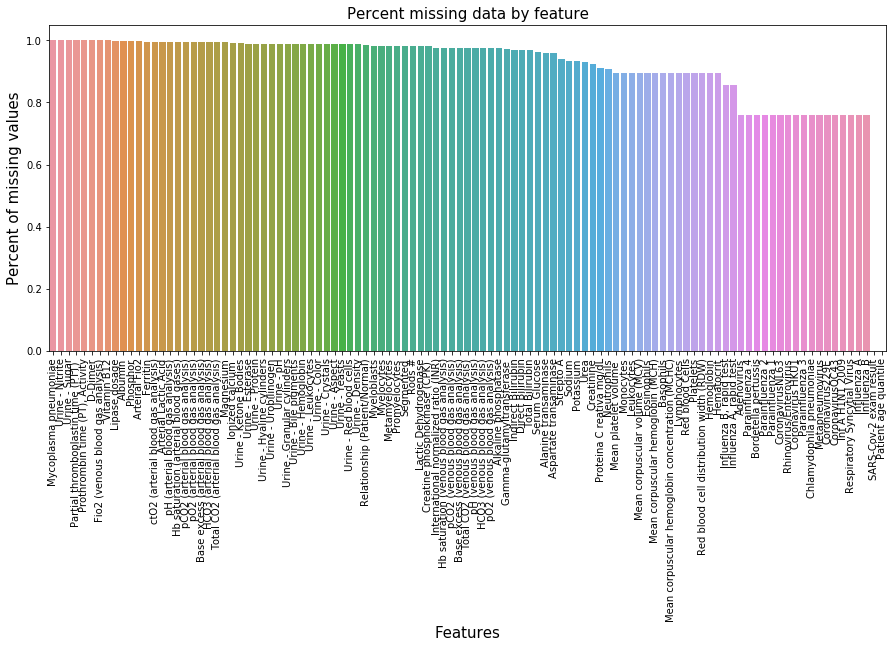

In [13]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
plot_missing_data(missing_data, 'Percent missing data by feature')
missing_data.head(10)

In [14]:
columns_to_exclude = missing_data.index[missing_data['Percent'] > 0.998].tolist()
dataset.drop(columns=columns_to_exclude, inplace=True)

,Total,Percent
Albumin,558,1.000000
Phosphor,557,0.998208
Ferritin,556,0.996416
Magnesium,553,0.991039
Ionized calcium,552,0.989247
Arteiral Fio2,549,0.983871
Rods #,549,0.983871
Segmented,549,0.983871
Promyelocytes,549,0.983871
Metamyelocytes,549,0.983871


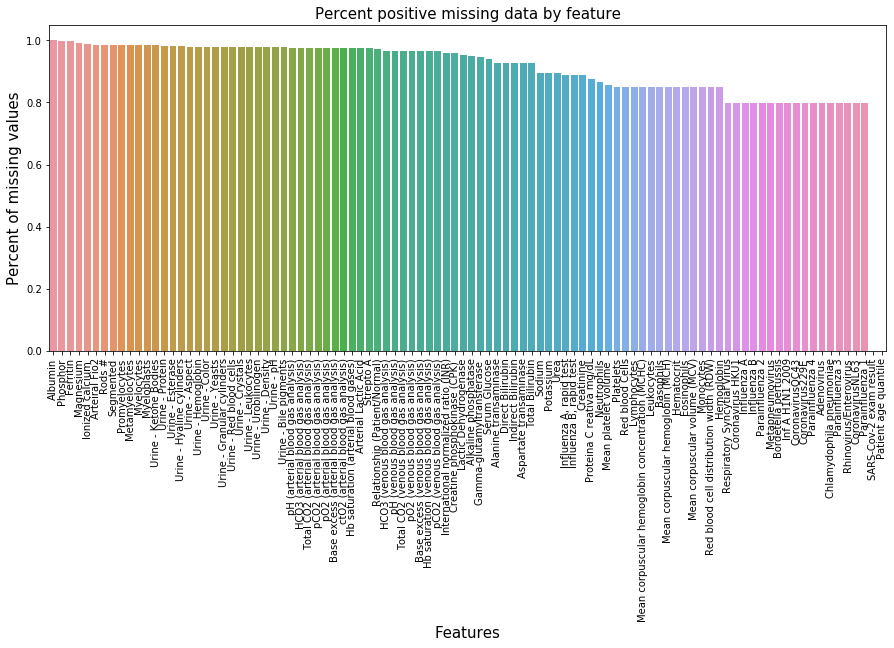

In [15]:
dataset_positive = dataset[dataset['SARS-Cov-2 exam result'] == 1]

total_positive = dataset_positive.isnull().sum().sort_values(ascending=False)
percent_positive = (dataset_positive.isnull().sum()/dataset_positive.isnull().count()).sort_values(ascending=False)
missing_data_positive = pd.concat([total_positive, percent_positive], axis=1, keys=['Total', 'Percent'])

plot_missing_data(missing_data_positive, 'Percent positive missing data by feature')
missing_data_positive.head(10)

,Total,Percent
Arteiral Fio2,5075,0.997837
Albumin,5073,0.997444
ctO2 (arterial blood gas analysis),5072,0.997247
pO2 (arterial blood gas analysis),5072,0.997247
HCO3 (arterial blood gas analysis),5072,0.997247
Total CO2 (arterial blood gas analysis),5072,0.997247
pH (arterial blood gas analysis),5072,0.997247
Base excess (arterial blood gas analysis),5072,0.997247
pCO2 (arterial blood gas analysis),5072,0.997247
Hb saturation (arterial blood gases),5072,0.997247


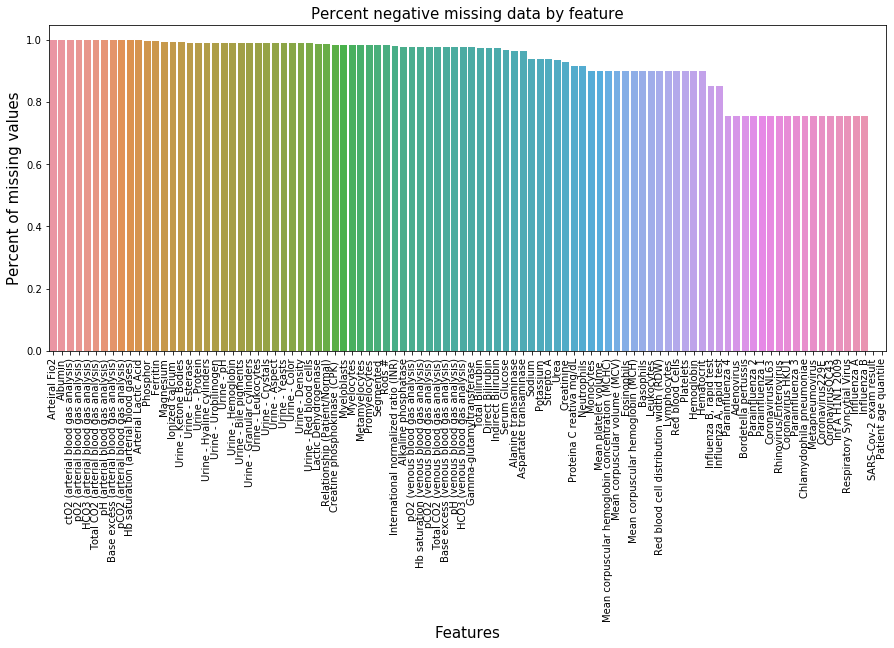

In [16]:
dataset_negative = dataset[dataset['SARS-Cov-2 exam result'] == 0]

total_negative = dataset_negative.isnull().sum().sort_values(ascending=False)
percent_negative = (dataset_negative.isnull().sum()/dataset_negative.isnull().count()).sort_values(ascending=False)
missing_data_negative = pd.concat([total_negative, percent_negative], axis=1, keys=['Total', 'Percent'])

plot_missing_data(missing_data_negative, 'Percent negative missing data by feature')
missing_data_negative.head(10)

In [17]:
dataset.drop(columns=['Albumin'], inplace=True)

## Correlation Matrix

In [18]:
corrmat = abs(dataset.corr())

In [19]:
# Correlation with output variable
cor_target = corrmat["SARS-Cov-2 exam result"]
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1].index.tolist()

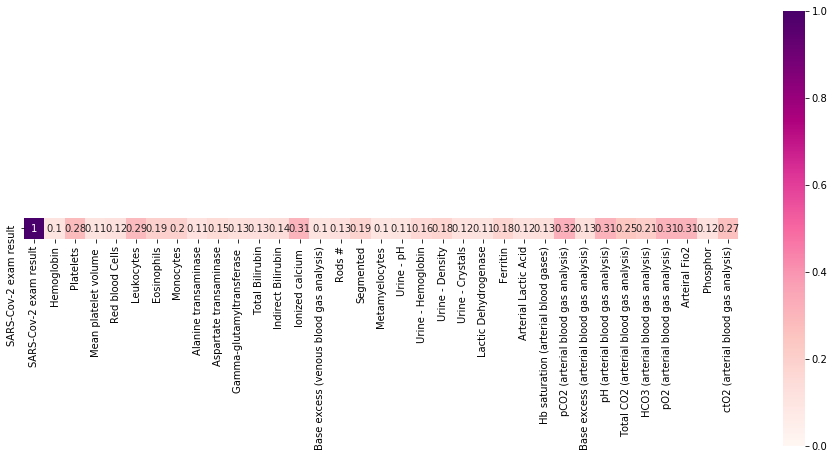

In [20]:
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(abs(dataset[relevant_features].corr().iloc[0:1, :]), yticklabels=[relevant_features[0]], xticklabels=relevant_features, vmin = 0.0, square=True, annot=True, vmax=1.0, cmap='RdPu')

## Negative and Positive Cases

In [21]:
nof_positive_cases = len(dataset_positive.index)
nof_negative_cases = len(dataset_negative.index)

(-1.1076132200227402,
 1.106918589509273,
 -1.1043893148273538,
 1.1002090207918012)

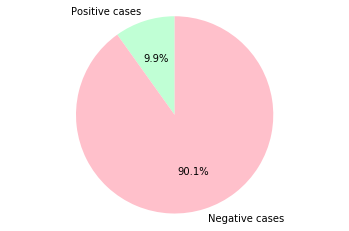

In [22]:
fig1, ax1 = plt.subplots()
ax1.pie([nof_positive_cases, nof_negative_cases], labels=['Positive cases', 'Negative cases'], autopct='%1.1f%%', startangle=90, colors=['#c0ffd5', '#ffc0cb'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

## Training to Predict COVID-19

### Split Dataset

In [23]:
y = dataset['SARS-Cov-2 exam result']
dataset.drop(columns=['SARS-Cov-2 exam result'], inplace=True)
X = dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

### Random Forest